In [27]:
import gtfs_kit as gk
import os.path
import geopandas as gpd
import geoplot as gplt
import datetime as dt
import gtfs_functions as gtfs

In [2]:
gtfs_dir = "/mnt/c/Users/maita.schade/Nextcloud/Documents/Work/Gap_Map/raw/gtfs"
years = [2020, 2021]
paths = {y: os.path.join(gtfs_dir,str(y),str(y)+".zip") for y in years}
#feeds = {y: gk.read_feed(paths[y], dist_units='km') for y in years}

Just March!

Helper function to get gtfs_kit dates in range:

In [3]:
def getGkDatesInRange(dt1, dt2):
    dates = [dt1 + dt.timedelta(d) for d in range((dt2-dt1).days)]
    return [gk.helpers.datestr_to_date(d, inverse=True) for d in dates]

Restrict feeds...

In [4]:
f20 = gk.read_feed(paths[2020], dist_units='km').restrict_to_dates(
    getGkDatesInRange(dt.date(2020,3,1),dt.date(2020,4,1))
)  

/home/mschade/anaconda3/envs/gapmapbox/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
f20.trips["shape_id"] = 0

In [5]:
f21 = gk.read_feed(paths[2021], dist_units='km').restrict_to_dates(
    getGkDatesInRange(dt.date(2021,3,1),dt.date(2021,4,1))
)  

In [40]:
f21.trips["shape_id"] = 0

Write out again to read with different package

In [26]:
out_dir = "/mnt/c/Users/maita.schade/Nextcloud/Documents/Work/Gap_Map/out"

In [41]:
f20.clean().write(os.path.join(out_dir, "2020", "2020_mar.zip"))

In [42]:
f21.clean().write(os.path.join(out_dir, "2021", "2021_mar.zip"))

In [ ]:
f20 = gtfs.import_gtfs(os.path.join(out_dir, "2020", "2020_mar.zip"), busiest_date=False)

In [ ]:
f21 = gtfs.import_gtfs(os.path.join(out_dir, "2021", "2021_mar.zip"), busiest_date=False)

In [46]:
f20 = {k:v for k,v in zip(["routes", "stops", "stop_times", "trips", "shapes"],f20)}

In [47]:
f21 = {k:v for k,v in zip(["routes", "stops", "stop_times", "trips", "shapes"],f21)}

In [50]:
cutoffs = [0,24]
stop_freq_21 = gtfs.stops_freq(f21["stop_times"], f21["stops"], cutoffs = cutoffs)

<AxesSubplot:>

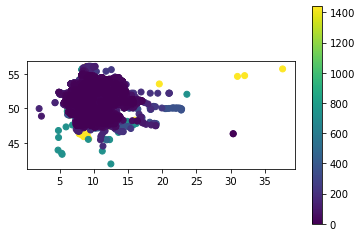

In [57]:
stop_freq_21.plot("frequency", legend=True)

In [54]:
stop_freq_20 = gtfs.stops_freq(f20["stop_times"], f20["stops"], cutoffs = cutoffs)

<AxesSubplot:>

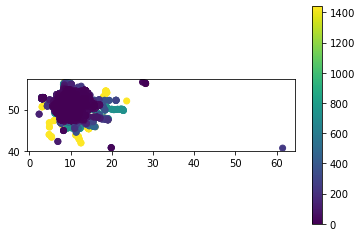

In [56]:
stop_freq_20.plot("frequency", legend=True)

Nach der zeitlichen Eingrenzung: ein Blick auf die räumliche, für die schlimmen Kreise.

In [61]:
kreise_gdf = gpd.read_file("/mnt/c/Users/maita.schade/Nextcloud/Documents/Work/Gap_Map/raw/geo/vg250-ew_12-31.utm32s.shape.ebenen/vg250-ew_ebenen_1231/VG250_KRS.shp"
                          ).to_crs("epsg:4326")
positiv_kreise = kreise_gdf[kreise_gdf.GEN.isin(["Harz", 
                                                 "Hameln-Pyrmont", 
                                                 "Märkischer Kreis",
                                                 "Olpe",
                                                 "Siegen-Wittgenstein"
                                                ])]
negativ_kreise = kreise_gdf[kreise_gdf.GEN.isin(["Wittenberg",
                                                 "Leer",
                                                 "Börde"
                                                ])]

Erstmal Gebiet auf einen Kreis einschränken und schauen was passiert.

In [63]:
positiv_area = positiv_kreise[positiv_kreise.GEN=="Harz"]
negativ_area = negativ_kreise[negativ_kreise.GEN=="Wittenberg"]

<AxesSubplot:>

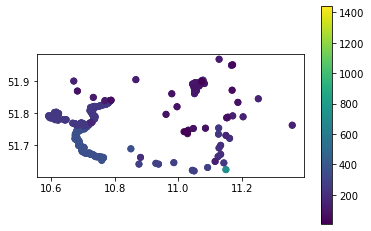

In [66]:
gpd.sjoin(stop_freq_20, positiv_area, op="within").plot("frequency",legend=True)

Sehr interessant--haben wir wirklich fast doppelt so viele Haltestellen?!
Schauen wir uns die mal an...

<AxesSubplot:>

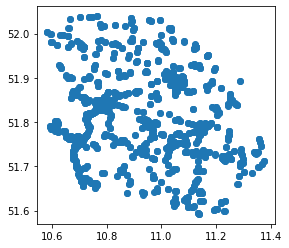

In [94]:
gpd.sjoin(gpd.GeoDataFrame(f20.stops, geometry=gpd.points_from_xy(f20.stops.stop_lon, f20.stops.stop_lat), crs="epsg:4326"),
          positiv_area, 
          op="within").plot()

In [99]:
len(f21.stop_times)

168417

<AxesSubplot:>

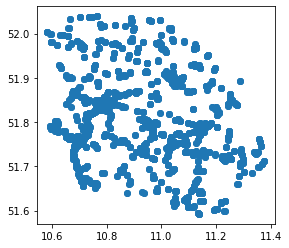

In [95]:
gpd.sjoin(gpd.GeoDataFrame(f21.stops, geometry=gpd.points_from_xy(f21.stops.stop_lon, f21.stops.stop_lat), crs="epsg:4326"),
          positiv_area, 
          op="within").plot()

/home/maita/anaconda3/envs/gapmapbox/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/maita/anaconda3/envs/gapmapbox/lib/python3.9/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

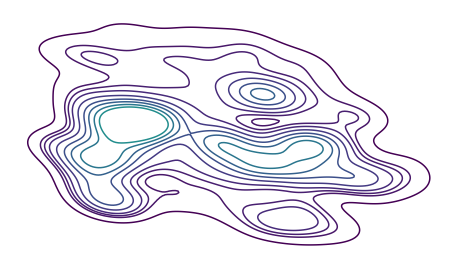

In [107]:
gplt.kdeplot(gpd.sjoin(gpd.GeoDataFrame(f21.stops, geometry=gpd.points_from_xy(f21.stops.stop_lon, f21.stops.stop_lat), crs="epsg:4326"),
          positiv_area, 
          op="within"))

/home/maita/anaconda3/envs/gapmapbox/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/maita/anaconda3/envs/gapmapbox/lib/python3.9/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

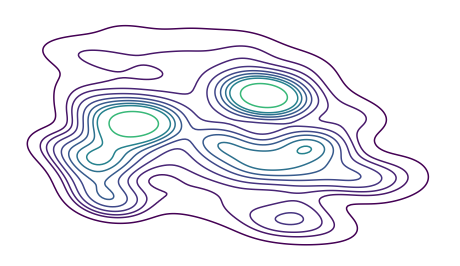

In [108]:
gplt.kdeplot(gpd.sjoin(gpd.GeoDataFrame(f20.stops, geometry=gpd.points_from_xy(f20.stops.stop_lon, f20.stops.stop_lat), crs="epsg:4326"),
          positiv_area, 
          op="within"))

In [111]:
stops_harz_20 = gpd.sjoin(gpd.GeoDataFrame(f20.stops, geometry=gpd.points_from_xy(f20.stops.stop_lon, f20.stops.stop_lat), crs="epsg:4326"),
          positiv_area, 
          op="within")

In [114]:
stops_harz_21 = gpd.sjoin(gpd.GeoDataFrame(f21.stops, geometry=gpd.points_from_xy(f21.stops.stop_lon, f21.stops.stop_lat), crs="epsg:4326"),
          positiv_area, 
          op="within")

In [128]:
stops_harz_21.drop([n for n in stops_harz_21.columns if "index" in n], axis=1,inplace=True)
stops_harz_20.drop([n for n in stops_harz_20.columns if "index" in n], axis=1,inplace=True)

,stop_id_left,stop_id_right
2397,392342,392342
2398,49728,49728
2400,237849,49728
2398,49728,237849
2400,237849,237849
...,...,...
940924,925268,554741
942802,181215,181215
942803,23441,181215
942802,181215,23441


In [166]:
def uniqueGdf(gdf):
    uni_gdf = gdf.iloc[[0]]
    for i, r in gdf.iterrows():
        if not (any([p.equals(r.geometry) for p in uni_gdf.geometry])):
            uni_gdf = uni_gdf.append(r) 
    return uni_gdf

In [203]:
point_counts_21 = gpd.sjoin(uni_gdf[["stop_id","geometry"]], stops_harz_21, op='intersects'
         ).groupby("stop_id_left"
                  ).agg({"stop_id_right":"count",
                         "geometry":"first", 
                         "stop_name":"first"
                        })

In [204]:
point_counts_21

,stop_id_right,geometry,stop_name
stop_id_left,,,
100636,2,POINT (11.11824 51.93056),Groß Quenstedt Heerstr.
101037,2,POINT (11.25363 51.85048),Hedersleben Neubauten L66
101161,2,POINT (10.84136 51.91468),Mulmke Kreisstr.
102493,2,POINT (10.82037 51.97674),Dardesheim Alter Bahnhof
102603,1,POINT (11.00846 51.90848),Kosakengrab
...,...,...,...
98858,1,POINT (10.72649 51.77040),Drei Annen Hohne Bf.
98910,3,POINT (11.04097 51.75330),Thale Karl-Marx-Str.
991,1,POINT (11.02359 51.91115),Sargstedter Siedlung


In [205]:
display(point_counts_21.stop_id_right.value_counts())
print(point_counts_21.stop_id_right.sum())

2    1094
1     496
3     333
4       3
Name: stop_id_right, dtype: int64

3695


In [206]:
point_counts_21[point_counts_21.stop_id_right>2]

,stop_id_right,geometry,stop_name
stop_id_left,,,
103329,3,POINT (11.33130 51.68451),Wieserode
105896,3,POINT (10.73903 51.78809),Wernigerode Drt_Drw 008 P8
109894,3,POINT (11.11911 51.60931),Neudorf Kirche
116481,3,POINT (10.86625 52.01599),Westerburg Burg
116718,3,POINT (11.05044 51.74773),Thale H.-Heine Str.
...,...,...,...
943229,3,POINT (11.13922 51.64013),Harzgerode Parkplatz
944087,3,POINT (10.90389 51.86727),Derenburg Gewerbegebiet
946055,3,POINT (10.69046 51.86128),Ilsenburg Sekundarschule


In [202]:
stops_harz_21[stops_harz_21.stop_id.isin(point_counts_21[point_counts_21.stop_id_right>2].index)]

,stop_name,parent_station,stop_code,stop_id,stop_lat,stop_lon,location_type,geometry,ADE,GF,...,NUTS,ARS_0,AGS_0,WSK,EWZ,KFL,DEBKG_ID,RS,SDV_RS,RS_0
2407,Abbenrode Wendeplatz,NaN,NaN,199447,51.929550,10.626381,1.0,POINT (10.62638 51.92955),4,4,...,DEE09,150850000000,15085000,2009-01-01,213310,2104.77,DEBKGDL20000E6Y3,15085,150850135135,150850000000
15102,Allrode Rosenweg,NaN,NaN,870686,51.674480,10.974545,1.0,POINT (10.97455 51.67448),4,4,...,DEE09,150850000000,15085000,2009-01-01,213310,2104.77,DEBKGDL20000E6Y3,15085,150850135135,150850000000
25278,Am Silbernen Mann Drängetal Gleis 1,NaN,NaN,13286,51.798153,10.729809,1.0,POINT (10.72981 51.79815),4,4,...,DEE09,150850000000,15085000,2009-01-01,213310,2104.77,DEBKGDL20000E6Y3,15085,150850135135,150850000000
25281,Am Silbernen Mann Drängetal Gleis 2,NaN,NaN,536534,51.798153,10.729896,1.0,POINT (10.72990 51.79815),4,4,...,DEE09,150850000000,15085000,2009-01-01,213310,2104.77,DEBKGDL20000E6Y3,15085,150850135135,150850000000
56925,Bad Suderode Markt,NaN,NaN,670974,51.728565,11.120022,1.0,POINT (11.12002 51.72857),4,4,...,DEE09,150850000000,15085000,2009-01-01,213310,2104.77,DEBKGDL20000E6Y3,15085,150850135135,150850000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907213,Wienrode Harzstr.,NaN,NaN,732770,51.765965,10.972901,1.0,POINT (10.97290 51.76597),4,4,...,DEE09,150850000000,15085000,2009-01-01,213310,2104.77,DEBKGDL20000E6Y3,15085,150850135135,150850000000
907221,Wienrode Mühlenstr.,NaN,NaN,394285,51.766594,10.973929,1.0,POINT (10.97393 51.76659),4,4,...,DEE09,150850000000,15085000,2009-01-01,213310,2104.77,DEBKGDL20000E6Y3,15085,150850135135,150850000000
908954,Wieserode,NaN,NaN,103329,51.684513,11.331302,1.0,POINT (11.33130 51.68451),4,4,...,DEE09,150850000000,15085000,2009-01-01,213310,2104.77,DEBKGDL20000E6Y3,15085,150850135135,150850000000
933287,Wülperode Zum Dören,NaN,NaN,491082,51.981240,10.601442,1.0,POINT (10.60144 51.98124),4,4,...,DEE09,150850000000,15085000,2009-01-01,213310,2104.77,DEBKGDL20000E6Y3,15085,150850135135,150850000000


In [192]:
point_counts_20 = gpd.sjoin(uniqueGdf(stops_harz_20)[["stop_id","geometry"]],
                            stops_harz_20, 
                            op='intersects'
         ).groupby("stop_id_left"
                  ).agg({"stop_id_right":"count",
                         "geometry":"first"
                        })

KeyboardInterrupt: 

In [207]:
display(point_counts_20.stop_id_right.value_counts())
print(point_counts_20.stop_id_right.sum())

1    1449
2     407
3       1
Name: stop_id_right, dtype: int64

2266


In [ ]:
point